# An Inverted Implementation

If the batch percentage is 50% or less then it is the same as the Naive implementation. Otherwise it eagerly generates the values to exclude and then iterates over all the values in the range and emits them if they are not excluded.

In [1]:
import random
from typing import Generator

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    N = max_num - min_num + 1
    
    if N < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    if batch_size == 0 or batch_size / N <= 0.5:
        unique_numbers = set()

        while len(unique_numbers) < batch_size:
            number = random.randint(min_num, max_num)
            if number not in unique_numbers:
                unique_numbers.add(number)
                yield number

    else:
        exclude = set()

        while len(exclude) < N - batch_size:
            number = random.randint(min_num, max_num)
            exclude.add(number)

        for number in range(min_num, max_num + 1):
            if number not in exclude:
                yield number

In [2]:
list(generate_unique_random_numbers(0, 9, 3))

[4, 0, 3]

## Distribution

We can run it multiple times and plot the results to convince ourselves that it is evenly distributed.

Chi-Square Statistic: 4.793333333333333
P-Value: 0.8519389084347533


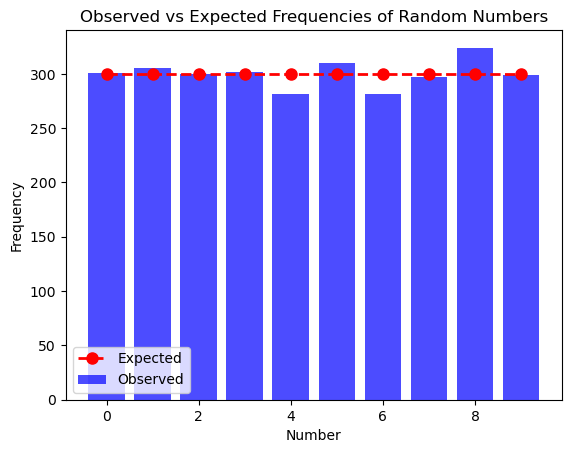

In [3]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The downside to this implementation is that the runtime is non-deterministic in general although behaves well on average.

The interesting thing about this is how the same almost identical to the Search implementations.

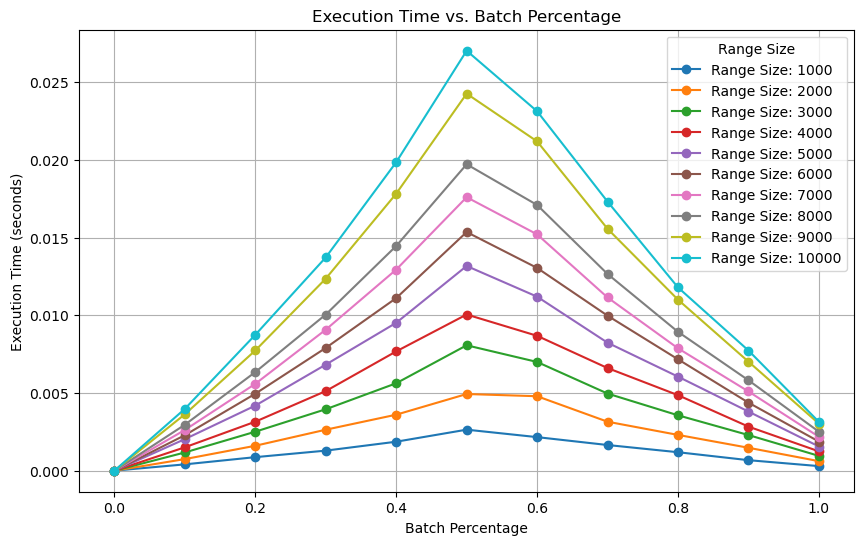

In [4]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size))
plot.execution_time(df)

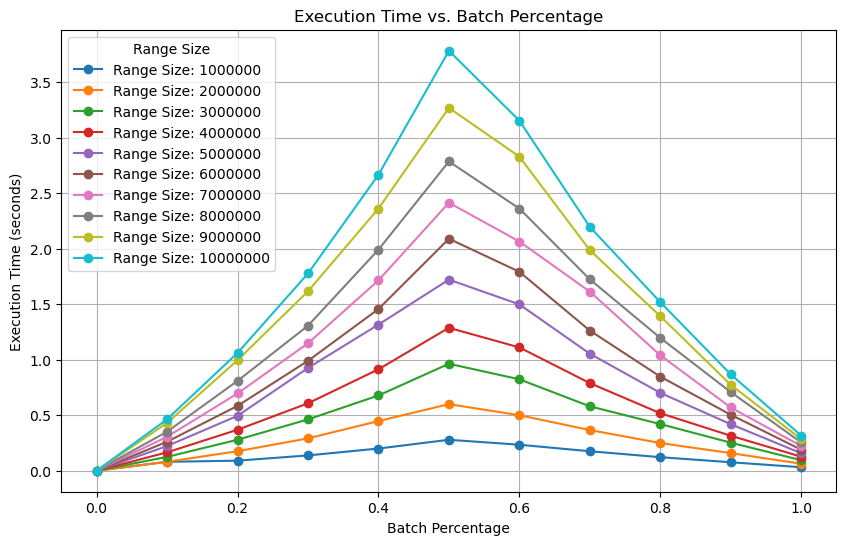

In [9]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size), size_range=range(1000000,10000001,1000000), iterations=1)
plot.execution_time(df)

## Memory Usage

The memory usage is linear relative to the batch size.